# William Etzler Big Data Econ Regression Analysis and Model Selection HW1
## 1.1 Predict Housing Prices

In [14]:
!pip install numpy matplotlib pandas scikit-learn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


                                              0.0/10.6 MB ? eta -:--:--
                                              0.1/10.6 MB 2.8 MB/s eta 0:00:04
     -                                        0.4/10.6 MB 4.6 MB/s eta 0:00:03
     -----                                    1.4/10.6 MB 11.0 MB/s eta 0:00:01
     ------------                             3.2/10.6 MB 18.8 MB/s eta 0:00:01
     -----------------                        4.5/10.6 MB 20.7 MB/s eta 0:00:01
     -----------------                        4.6/10.6 MB 17.4 MB/s eta 0:00:01
     ------------------------------           8.1/10.6 MB 26.1 MB/s eta 0:00:01
     ------------------------------------     9.6/10.6 MB 26.8 MB/s eta 0:00:01
     --------------------------------------  10.6/10.6 MB 32.7 MB/s eta 0:00:01
     --------------------------------------- 10.6/10.6 MB 28.5 MB/s eta 0:00:00
  Using cached scipy-1.12.0-cp311-cp311-win_amd64.whl (46.2 MB)
                                              0.0/302.2 kB ? eta -

In [10]:
# load in and check data
dpath = r'C:\Users\wetzl\Desktop\Python\BigData\hw1data.txt' 
d = pd.read_csv(dpath, delim_whitespace=True)
d.head

C:\Users\wetzl\AppData\Local\Temp\ipykernel_33476\2063195778.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  d = pd.read_csv(dpath, delim_whitespace=True)


<bound method NDFrame.head of       Value   Price  Square_Footage  Number_Bedrooms
0    119.37  121.87            20.5              4.0
1    148.93  150.25            22.0              4.0
2    130.39  122.78            15.9              3.0
3    135.70  144.35            18.6              3.0
4    126.30  116.20            12.1              2.0
..      ...     ...             ...              ...
145  126.67  128.52            14.3              2.0
146  137.57  132.02            17.1              4.0
147  133.46  128.03            15.8              2.0
148  163.57  168.06            23.5              5.0
149  118.46  114.92            14.2              2.0

[150 rows x 4 columns]>

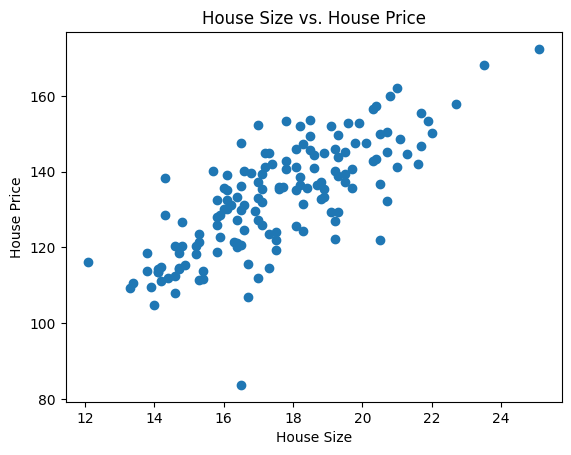

After plotting, can conclude there is a linear relationship between house size and house price.


In [25]:
# 1. Visualize the Data:
plt.scatter(d['Square_Footage'], d['Price'])
plt.title('House Size vs. House Price')
plt.xlabel('House Size')
plt.ylabel('House Price')
plt.show() 
print("After plotting, can conclude there is a linear relationship between house size and house price.")

In [23]:
# 2. Linear Regression Analysis:
x = d[['Square_Footage']]
y = d['Price']

model = LinearRegression()
model.fit(x, y)

intercept = model.intercept_
slope = model.coef_[0]
print(f"equation: y = {slope:.2f}x + {intercept:.2f}")

equation: y = 4.76x + 49.50


C:\Users\wetzl\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


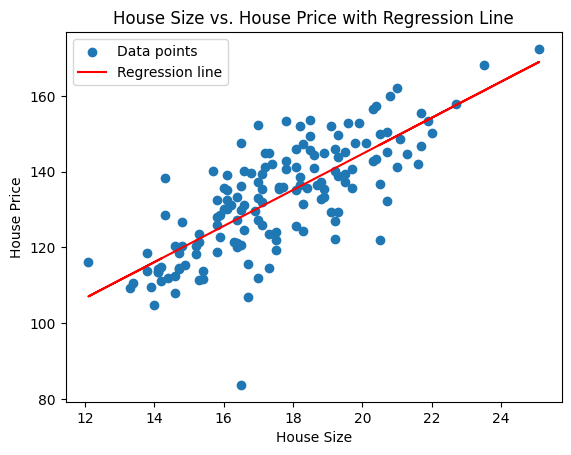

In [27]:
# 3. Regression Line Plotting:
plt.scatter(d['Square_Footage'], d['Price'], label='Data points')
plt.plot(d['Square_Footage'], model.predict(X), color='red', label='Regression line')
plt.title('House Size vs. House Price with Regression Line')
plt.xlabel('House Size')
plt.ylabel('House Price')
plt.legend()
plt.show()

In [29]:
# 4. Price Prediction:
p_predict = model.predict([[20]])[0]*1000
print(f'Predicted price of a 2000 square feet house: ${p_predict:.2f}')

Predicted price of a 2000 square feet house: $144685.03


C:\Users\wetzl\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [33]:
# 5. Data Anomalies:
print(f'There is one large outlier around x = 16.7 and y = 83 thats well underneath the normal distribution')

There is one large outlier around x = 16.7 and y = 83 thats well underneath the normal distribution


In [39]:
# 6. Correlation Analysis:
cor_coef = d['Square_Footage'].corr(d['Price'])
r_squared = cor_coef ** 2

# Comparison
r_squared_regression = model.score(x, y)

print(f"Correlation coefficient (r): {cor_coef:}")
print(f"Squared correlation coefficient (r^2): {r_squared:}")
print(f"R^2 value from regression analysis: {r_squared_regression:}")
print(f"The very similar R squared values validates the the models effectiveness to model the correlation between price and size. This means approximately 58.1% of the variability in house prices can be explained by the size of the houses. The last 41.9% would be due to factors not specified in the model.")

Correlation coefficient (r): 0.7624345025925119
Squared correlation coefficient (r^2): 0.581306370743491
R^2 value from regression analysis: 0.5813063707434907
The very similar R squared values validates the the models effectiveness to model the correlation between price and size. This means approximately 58.1% of the variability in house prices can be explained by the size of the houses. The last 41.9% would be due to factors not specified in the model.


## 1.2 Regression on Synthetic Data

In [ ]:
# 1. Generation of Independent Variables: